## Creating CNN Using Transfer Learning (VGG19)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Test'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




80142336/80134624 [==============================] - 2s 0us/step


In [6]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/Dataset/Train/*')

In [8]:
folders

['/content/drive/MyDrive/Colab Notebooks/Dataset/Train/Parasite',
 '/content/drive/MyDrive/Colab Notebooks/Dataset/Train/Uninfected']

In [9]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [16]:
training_set

In [17]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
13/13 [==============================] - 351s 27s/step - loss: 1.1390 - accuracy: 0.5521 - val_loss: 0.8833 - val_accuracy: 0.4776
Epoch 2/50
13/13 [==============================] - 6s 470ms/step - loss: 0.4973 - accuracy: 0.7697 - val_loss: 0.4730 - val_accuracy: 0.7687
Epoch 3/50
13/13 [==============================] - 6s 468ms/step - loss: 0.4012 - accuracy: 0.8178 - val_loss: 0.4483 - val_accuracy: 0.7463
Epoch 4/50
13/13 [==============================] - 6s 472ms/step - loss: 0.3572 - accuracy: 0.8507 - val_loss: 0.4174 - val_accuracy: 0.8358
Epoch 5/50
13/13 [==============================] - 6s 470ms/step - loss: 0.2983 - accuracy: 0.9017 - val_loss: 0.4778 - val_accuracy: 0.7761
Epoch 6/50
13/13 [==============================] - 6s 471ms/step - loss: 0.3123 - accuracy: 0.8403 - val_loss: 0.4658 - val_accuracy: 0.7015
Epoch 7/50
13/13 [==============================] - 6s 470ms/step - loss: 0.3429 - accuracy: 0.8297 - val_loss: 0.3762 - val_accuracy: 0.7761
Epoch 

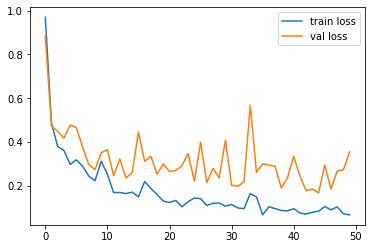

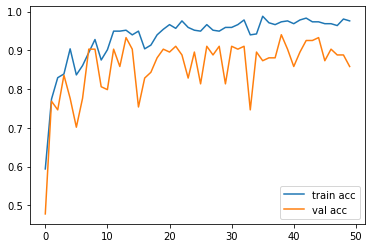

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [21]:

y_pred = model.predict(test_set)


In [22]:
y_pred

array([[9.89509106e-01, 1.04908925e-02],
       [9.98372257e-01, 1.62779703e-03],
       [2.36240495e-02, 9.76375937e-01],
       [2.37285092e-01, 7.62714863e-01],
       [1.94089941e-03, 9.98059094e-01],
       [1.98449977e-02, 9.80155051e-01],
       [9.94164288e-01, 5.83572639e-03],
       [7.35895693e-01, 2.64104337e-01],
       [3.08336746e-02, 9.69166279e-01],
       [1.00000000e+00, 4.87628071e-08],
       [6.49968207e-01, 3.50031823e-01],
       [4.92190905e-02, 9.50780928e-01],
       [9.98383522e-01, 1.61650684e-03],
       [1.64574832e-02, 9.83542562e-01],
       [8.86628985e-01, 1.13371022e-01],
       [8.52923840e-02, 9.14707601e-01],
       [3.36066969e-02, 9.66393292e-01],
       [9.81706083e-01, 1.82938427e-02],
       [6.23287022e-01, 3.76713037e-01],
       [9.95166898e-01, 4.83308500e-03],
       [9.96500611e-01, 3.49943712e-03],
       [1.24328565e-02, 9.87567186e-01],
       [9.99620080e-01, 3.79866076e-04],
       [1.88648656e-01, 8.11351359e-01],
       [9.977912

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1])

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model=load_model('model_vgg19.h5')

In [81]:
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [82]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [83]:
x.shape

(224, 224, 3)

In [84]:
x=x/255

In [85]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [86]:
model.predict(img_data)

array([[0.03657779, 0.96342224]], dtype=float32)

In [87]:
a=np.argmax(model.predict(img_data), axis=1)

In [88]:
a

array([1])

In [89]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
